**Graphical Method**

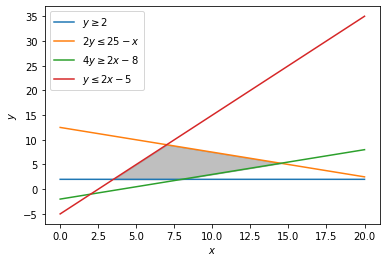

In [ ]:
#Graphical method
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Construct lines
# x > 0
x = np.linspace(0, 20, 2000)
# y >= 2
y1 = (x*0) + 2
# 2y <= 25 - x
y2 = (25-x)/2.0
# 4y >= 2x - 8
y3 = (2*x-8)/4.0
# y <= 2x - 5
y4 = 2 * x -5
# Make plot
plt.plot(x, y1, label=r'$y\geq2$')
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
# plt.xlim((0, 16))
# plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
# Fill feasible region
y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend()

**Simplex Method**

In [ ]:
#simplex method
import numpy as np
import scipy as sp
c = [-3, -5]
a = [[1, 0], [0, 2], [3, 2]]
b = [4, 12, 18]
x0_bounds = (0, None)
x1_bounds = (0, None)
from scipy.optimize import linprog
# Solve the problem by Simplex method in Optimization
res = linprog(c, a, b, bounds=(x0_bounds, x1_bounds), method='simplex')
print (res)

     con: array([], dtype=float64)
     fun: -36.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([2., 0., 0.])
  status: 0
 success: True
       x: array([2., 6.])


**Two Phase Simplex**

In [ ]:
#Two Phase Simplex Method
import numpy as np
import scipy as sp
c = [-1,-1,-1,-1,-1]
a = [[3,2,1,0,0], [5,1,1,1, 0], [2,5,1,0,1]]
b = [1,3,4]
x0_bounds = (0, None)
x1_bounds = (0, None)
x2_bounds = (0, None)
x3_bounds = (0, None)
x4_bounds = (0, None)
from scipy.optimize import linprog
# Solve the problem by Revised Simplex method in Optimization
res = linprog(c, a, b, bounds=(x0_bounds, x1_bounds,x2_bounds,x3_bounds,x4_bounds), method='revised simplex')
print (res)

     con: array([], dtype=float64)
     fun: -7.0
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([1., 0., 0.])
  status: 0
 success: True
       x: array([0., 0., 0., 3., 4.])


In [ ]:
pip install pulp

     |████████████████████████████████| 41.2 MB 71 kB/s 


**Duality or Dual Simplex**

In [ ]:
#duality
from pulp import *
prob = LpProblem("Dual problem",LpMinimize)
# nonnegativity constraints
x1=LpVariable("x1",0)
x2=LpVariable("x2",0)
# objective function
prob += 21*x1 + 50*x2, "Minimum value of 21*x1 + 50*x2"
# main constraints
prob += 2 * x1 + 5* x2 >= 12, "constraint 1"
prob += 3 * x1 + 7 * x2 >= 17, "constraint 2"
# The problem is solved using PuLP's choice of Solver
prob.solve()
print(LpStatus[prob.status])
for i in prob.variables():
  print("Variable",i.name,"=", i.varValue)
print ("Objective function z =",pulp.value(prob.objective))

Optimal
Variable x1 = 1.0
Variable x2 = 2.0
Objective function z = 121.0


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


**For all Transporatation Problems(North West, Row-Minima, Column-Minima, Vogel, U-V, Least Cell Methods) Using PULP**

In [ ]:
#Transportation
from pulp import*
M = 3
N = 4
xindx = []
for i in range(M):
  for j in range(N):
    xindx.append((i+1,j+1))
model = LpProblem("Transportation Problem 1", LpMinimize)
x = LpVariable.dicts("X",xindx,0,None)
model += 20.0 * x[1,1] + 40.0 * x[1,2] + 70.0 * x[1,3] + 50.0 * x[1,4] + 100*x[2,1] + 60.0*x[2,2] + 90.0*x[2,3] + 80.0 * x[2,4] + 10.0 *x[3,1] + 110.0*x[3,2] + 30.0*x[3,3] + 200*x[3,4], "Transportation cost"
model+=x[1,1] + x[1,2]+x[1,3]+x[1,4] <= 400.0, "S Pt1"
model +=x[2,1] + x[2,2]+x[2,3]+x[2,4]<=1500.0, "S Pt2"
model +=x[3,1]+x[3,2]+x[3,3]+x[3,4]<=900.0, "S Pt3"
model +=x[1,1]+x[2,1]+x[3,1]>=700.0,"D Pt1"
model+=x[1,2] + x[2,2]+x[3,2]+x[3,2] >= 600.0, "D Pt2"
model +=x[1,3] + x[2,3]+x[3,3]+x[3,3]>=1000.0, "DPt3"
model +=x[1,4]+x[2,4]+x[3,4]+x[3,4]>=500.0, "D Pt4"
model.solve()
print("Status:", LpStatus[model.status])
for v in model.variables():
  print(v.name, "=",v.varValue)
print("Obj fun",value(model.objective))

Status: Optimal
X_(1,_1) = 300.0
X_(1,_2) = 0.0
X_(1,_3) = 0.0
X_(1,_4) = 100.0
X_(2,_1) = 0.0
X_(2,_2) = 600.0
X_(2,_3) = 0.0
X_(2,_4) = 400.0
X_(3,_1) = 400.0
X_(3,_2) = 0.0
X_(3,_3) = 500.0
X_(3,_4) = 0.0
Obj fun 98000.0


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


**NorthWest Using Python**

In [ ]:
#Transportation NW method in LinearProgramming(UV-method)
def north_west_corner(supply, demand):
  supply_copy = supply.copy() 
  demand_copy= demand.copy()
  i = 0
  j = 0
  bfs = []
  while len(bfs) < len(supply) + len(demand) - 1: 
    s= supply_copy[i]
    d = demand_copy[j] 
    v= min(s, d)
    supply_copy[i] -= v
    demand_copy[j] -=v
    bfs.append(((i, j),v))
    if supply_copy[i] == 0 and i < len(supply) - 1:
      i+= 1
    elif demand_copy[j] == 0 and j < len(demand) - 1:
      j+= 1
  return bfs
supply = [30, 70,50]
demand = [40, 30, 40, 40]
bfs= north_west_corner(supply, demand)
print(bfs)

[((0, 0), 30), ((1, 0), 10), ((1, 1), 30), ((1, 2), 30), ((2, 2), 10), ((2, 3), 40)]


**Hungarian Method Using Scipy**

In [ ]:
#Hungarian Method
import numpy as np
import scipy

cost = np.array([[9,11,14,11,7], [6,15,13,13,10], [12,13,6,8,8], [11,9,10,12,9], [7,12,14,10,14]])
from scipy.optimize import linear_sum_assignment
row_ind, col_ind = linear_sum_assignment(cost)
print(col_ind)
print(cost[row_ind, col_ind].sum())

[4 0 2 1 3]
38


**Row Minima Method**

In [ ]:
import sys

def Row_Minima(supply, demand, costs):
  r= len(costs) 
  c= len(costs[0])
  i = 0
  j = 0 
  bfs = [] 
  total =0
  while i<r: 
    j=0
    while j<c and supply[i]!=0: 
      m=costs[i].index(min(costs[i]))
      if supply[i]>=demand[m] and demand[m]!=0: 
        total=total+demand[m]*costs[i][m]
        bfs.append(((i,m), demand[m]))
        supply[i] = supply[i]-demand[m] 
        demand[m]=0
        for k in range( i, r):
          costs[k][m]=sys.maxsize
      elif (supply[i]<= demand[m] and demand[m] !=0): 
        total = total + supply[i]*costs[i][m] 
        bfs.append(((i, m), supply[i]))
        demand [m] = demand [m]-supply [i] 
        supply[i] =0
        for k in range( i, c):
          costs[i][k]=sys.maxsize
      j=j+1
    i=i+1
  print("Total cost=", total)
supply = [200, 160, 90]
demand = [180, 120, 150]
costs= [[16, 20, 12],[14,8,18],[26,24,16]]
Row_Minima(supply, demand, costs)

Total cost= 6460


**Hungarian Method Using PIP**

In [ ]:
pip install hungarian-algorithm

In [ ]:
from hungarian_algorithm import algorithm
H = {
	'A': { '#191': 22, '#122': 14, '#173': 120, '#121': 21, '#128': 4, '#104': 51 },
	'B': { '#191': 19, '#122': 12, '#173': 172, '#121': 21, '#128': 28, '#104': 43 },
	'C': { '#191': 161, '#122': 122, '#173': 2, '#121': 50, '#128': 128, '#104': 39 },
	'D': { '#191': 19, '#122': 22, '#173': 90, '#121': 11, '#128': 28, '#104': 4 },
	'E': { '#191': 1, '#122': 30, '#173': 113, '#121': 14, '#128': 28, '#104': 86 },
	'F': { '#191': 60, '#122': 70, '#173': 170, '#121': 28, '#128': 68, '#104': 104 },
}
res = algorithm.find_matching(H, matching_type = 'min', return_type = 'list' )
print(res)

[(('A', '#128'), 4), (('B', '#122'), 12), (('D', '#104'), 4), (('F', '#121'), 28), (('E', '#191'), 1), (('C', '#173'), 2)]


**Branch and Bound**

In [ ]:
import math
maxsize = float('inf')
def copyToFinal(curr_path):
  final_path[:N + 1] = curr_path[:]
  final_path[N] = curr_path[0]
def firstMin(adj, i):
  min = maxsize
  for k in range(N):
    if adj[i][k] < min and i != k:
       min = adj[i][k]
  return min

def secondMin(adj, i):
  first, second = maxsize, maxsize
  for j in range(N):
    if i == j:
      continue
    if adj[i][j] <= first:
      second = first
      first = adj[i][j]
    elif(adj[i][j] <= second and adj[i][j] != first):
      second = adj[i][j]
  return second

def TSPRec(adj, curr_bound, curr_weight,level, curr_path, visited):
  global final_res 
  if level == N:
    if adj[curr_path[level - 1]][curr_path[0]] != 0:
      curr_res = curr_weight + adj[curr_path[level - 1]][curr_path[0]]
      if curr_res < final_res:
        copyToFinal(curr_path)
        final_res = curr_res
    return
  for i in range(N):
    if (adj[curr_path[level-1]][i] != 0 and visited[i] == False):
      temp = curr_bound
      curr_weight += adj[curr_path[level - 1]][i]
      if level == 1:
        curr_bound -= ((firstMin(adj, curr_path[level - 1]) + firstMin(adj, i)) / 2)
      else:
        curr_bound -= ((secondMin(adj, curr_path[level - 1]) + firstMin(adj, i)) / 2)
      if curr_bound + curr_weight < final_res:
        curr_path[level] = i
        visited[i] = True
        TSPRec(adj, curr_bound, curr_weight,level + 1, curr_path, visited)
      curr_weight -= adj[curr_path[level - 1]][i]
      curr_bound = temp
      visited = [False] * len(visited)
      for j in range(level):
        if curr_path[j] != -1:
          visited[curr_path[j]] = True

def TSP(adj):
  curr_bound = 0
  curr_path = [-1] * (N + 1)
  visited = [False] * N
  for i in range(N):
    curr_bound += (firstMin(adj, i) +secondMin(adj, i))
  curr_bound = math.ceil(curr_bound / 2)
  visited[0] = True
  curr_path[0] = 0
  TSPRec(adj, curr_bound, 0, 1, curr_path, visited)

#Driver Code
adj = [[0, 10, 15, 20],
[10, 0, 35, 25],
[15, 35, 0, 30],
[20, 25, 30, 0]]
N = 4
final_path = [None] * (N + 1)
visited = [False] * N
final_res = maxsize
TSP(adj)
print("Minimum cost :", final_res)
print("Path Taken : ", end = ' ') 
for i in range(N + 1):
  print(final_path[i], end = ' ')

Minimum cost : 80
Path Taken :  0 1 3 2 0 

**Two Phase Simplex Method**

In [ ]:
#two phase Simplex Method
"""
Minimize: z = x1 + x2 + x3 + x4 + x5


Subject to: 
        3x1 + 2x2 + x3               = 1
                 5x1 +  x2 +  x3 + x4        = 3
                 2x1 + 5x2 + x3 +       x5  = 4
"""
def printTableu(tableu):
 print('----------------------')
 for row in tableu:
  print(row)
 print('----------------------')
 return

def pivotOn(tableu, row, col):
 j = 0
 pivot = tableu[row][col]
 for x in tableu[row]:
  tableu[row][j] = tableu[row][j] / pivot
  j += 1
 i = 0
 for xi in tableu:
  if i != row:
   ratio = xi[col]
   j = 0
   for xij in xi:
    xij -= ratio * tableu[row][j]
    tableu[i][j] = xij
    j += 1
  i += 1
 return tableu

# assuming tablue in standard form with basis formed in last m columns
def phase_1_simplex(tableu):
 
 THETA_INFINITE = -1
 opt   = False
 unbounded  = False
 n = len(tableu[0])
 m = len(tableu) - 2
 
 while ((not opt) and (not unbounded)):
  min = 0.0
  pivotCol = j = 1
  while(j < (n-m)):
   cj = tableu[1][j]
   if (cj < min):
    min = cj
    pivotCol = j
   j += 1   
  if min == 0.0:
   opt = True
   continue
  pivotRow = i = 0
  minTheta = THETA_INFINITE
  for xi in tableu:
   if (i > 1):
    xij = xi[pivotCol]
    if xij > 0:
     theta = (xi[0] / xij)
     if (theta < minTheta) or (minTheta == THETA_INFINITE):
      minTheta = theta
      pivotRow = i
   i += 1
  if minTheta == THETA_INFINITE:
   unbounded = True
   continue
  tableu = pivotOn(tableu, pivotRow, pivotCol)
 return tableu
 
def simplex(tableu):
 
 THETA_INFINITE = -1
 opt   = False
 unbounded  = False
 n = len(tableu[0])
 m = len(tableu) - 1
 
 while ((not opt) and (not unbounded)):
  min = 0.0
  pivotCol = j = 0
  while(j < (n-m)):
   cj = tableu[0][j]
   if (cj < min) and (j > 0):
    min = cj
    pivotCol = j
   j += 1   
  if min == 0.0:
   opt = True
   continue
  pivotRow = i = 0
  minTheta = THETA_INFINITE
  for xi in tableu:
   if (i > 0):
    xij = xi[pivotCol]
    if xij > 0:
     theta = (xi[0] / xij)
     if (theta < minTheta) or (minTheta == THETA_INFINITE):
      minTheta = theta
      pivotRow = i
   i += 1
  if minTheta == THETA_INFINITE:
   unbounded = True
   continue
  tableu = pivotOn(tableu, pivotRow, pivotCol)
 return tableu
  
def drive_out_artificial_basis(tableu):
 n = len(tableu[0])
 j = n - 1
 isbasis = True
 while(j > 0):
  found = False
  i = -1
  row = 0
  for xi in tableu:
   i += 1
   if (xi[j] == 1):
    if (found):
     isbasis = False
     continue
    elif (i > 1):
     row = i
     found = True
   elif (xi[0] != 0):
    isbasis = False
    continue
  if (isbasis and found):
   if (j >= n):
    tableu = pivotOn(tableu, row, j)
   else:
    return tableu
  j -= 1
 return tableu
  
def two_phase_simpelx(tableu):
 infeasible  = False
 tableu = phase_1_simplex(tableu)
 sigma = tableu[1][0]
 if (sigma > 0):
  infeasible  = True
  print('infeasible')
 else:
  #sigma is equals to zero
  tableu = drive_out_artificial_basis(tableu)
  m = len(tableu) - 2
  n = len(tableu[0])
  n -= m
  tableu.pop(1)
  i = 0
  while (i < len(tableu)):
   tableu[i] = tableu[i][:n]
   i += 1
  tableu = simplex(tableu)
 return tableu
 
def getTableu(c, eqs, b):
 #assume b >= 0 so if there is any b[i] negative make sure to enter
 #it possitive by multiplying (-1 * eqs[i]) and (-1 * b[i]) for all i
 tableu = []
 m = len(eqs)
 n = len(c)
 c.insert(0, 0.0)
 artificial = []
 sigma = [0.0]
 i = 0
 while (i < n):
  sigma.append(0.0)
  i += 1
 i = 0
 while (i < m):
  artificial.append(0.0)
  sigma.append(1.0)
  i += 1
 c.extend(artificial)
 tableu.append(c)
 tableu.append(sigma)
 i = 0
 for eq in eqs:
  eq.insert(0, b[i])
  eq.extend(artificial)
  eq[n+1+i] = 1.0
  tableu.append(eq)
  i += 1
 i = 0 
 for xi in tableu:
  if (i > 1):
   j = 0
   for xij in xi:
    tableu[1][j] -= xij
    j += 1
  i += 1
 return tableu

c = [ 1.0, 1.0, 1.0, 1.0, 1.0,]
eq1 = [ 3.0 ,  2.0 , 1.0 ,  0.0,  0.0]
eq2 = [ 5.0 ,  1.0 , 1.0 ,  1.0,  0.0]
eq3 = [ 2.0 ,  5.0 , 1.0 ,  0.0,  1.0]

b = [1.0 , 3.0 , 4.0]

eqs = []
eqs.append(eq1)
eqs.append(eq2)
eqs.append(eq3)

tableu = getTableu(c,eqs,b)
printTableu(tableu)
tableu = two_phase_simpelx(tableu)

printTableu(tableu)
print('minimum cost is = {}'.format( -tableu[0][0]))

----------------------
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
[-8.0, -10.0, -8.0, -3.0, -1.0, -1.0, 0.0, 0.0, 0.0]
[1.0, 3.0, 2.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[3.0, 5.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0]
[4.0, 2.0, 5.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0]
----------------------
----------------------
[-4.5, 1.5000000000000004, 0.0, 1.5, 0.0, 0.0]
[0.5, 1.5, 1.0, 0.5, 0.0, 0.0]
[2.5, 3.4999999999999996, 0.0, 0.5, 1.0, 0.0]
[1.5, -5.5, 0.0, -1.5, 0.0, 1.0]
----------------------
minimum cost is = 4.5


**Vogel Approximation Method**

In [ ]:
from collections import defaultdict
 
costs  = {'W': {'A': 16, 'B': 16, 'C': 13, 'D': 22, 'E': 17},
          'X': {'A': 14, 'B': 14, 'C': 13, 'D': 19, 'E': 15},
          'Y': {'A': 19, 'B': 19, 'C': 20, 'D': 23, 'E': 50},
          'Z': {'A': 50, 'B': 12, 'C': 50, 'D': 15, 'E': 11}}
demand = {'A': 30, 'B': 20, 'C': 70, 'D': 30, 'E': 60}
cols = sorted(demand.keys())
supply = {'W': 50, 'X': 60, 'Y': 50, 'Z': 50}
res = dict((k, defaultdict(int)) for k in costs)
g = {}
for x in supply:
    g[x] = sorted(costs[x].keys(), key=lambda g: costs[x][g])
for x in demand:
    g[x] = sorted(costs.keys(), key=lambda g: costs[g][x])
 
while g:
    d = {}
    for x in demand:
        d[x] = (costs[g[x][1]][x] - costs[g[x][0]][x]) if len(g[x]) > 1 else costs[g[x][0]][x]
    s = {}
    for x in supply:
        s[x] = (costs[x][g[x][1]] - costs[x][g[x][0]]) if len(g[x]) > 1 else costs[x][g[x][0]]
    f = max(d, key=lambda n: d[n])
    t = max(s, key=lambda n: s[n])
    t, f = (f, g[f][0]) if d[f] > s[t] else (g[t][0], t)
    v = min(supply[f], demand[t])
    res[f][t] += v
    demand[t] -= v
    if demand[t] == 0:
        for k, n in supply.items():
            if n != 0:
                g[k].remove(t)
        del g[t]
        del demand[t]
    supply[f] -= v
    if supply[f] == 0:
        for k, n in demand.items():
            if n != 0:
                g[k].remove(f)
        del g[f]
        del supply[f]
 
for n in cols:
    print(n,end=" ")
print()
cost = 0
for g in sorted(costs):
    print(g,end=" ")
    for n in cols:
        y = res[g][n]
        if y != 0:
            print(y,end=" ")
        cost += y * costs[g][n]
print("\n\nTotal Cost = ", cost)

A B C D E 
W 50 X 20 40 Y 30 20 Z 30 20 

Total Cost =  3130
